# Dataset Exploratory Data Analysis

In [30]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os

# Import training and test (solution) data
train_df = pd.read_csv('../data/Movies/clean_train_data.csv')
test_df = pd.read_csv('../data/Movies/clean_test_data.csv')

# Remove blanck spaces in genre column
train_df['genre'] = train_df['genre'].str.strip()
test_df['genre'] = test_df['genre'].str.strip()


In [31]:
test_df.head()

,title,genre,plot,no_punct,tokenized,no_small_words,no_stopwords,lemmatized,pos_tagged,processed_text
0,Edgar's Lunch (1998),thriller,"L.R. Brane loves his life - his car, his apar...","l.r. brane loves his life - his car, his apart...","['l.r', '.', 'brane', 'loves', 'his', 'life', ...","['brane', 'loves', 'life', 'apartment', 'espec...","['brane', 'loves', 'life', 'apartment', 'espec...","['brane', 'love', 'life', 'apartment', 'especi...","[('brane', 'NN'), ('loves', 'VBZ'), ('life', '...",brane love life apartment especially girlfrien...
1,La guerra de papá (1977),comedy,"Spain, March 1964: Quico is a very naughty ch...","spain, march 1964: quico is a very naughty chi...","['spain', ',', 'march', '1964', ':', 'quico', ...","['spain', 'march', '1964', 'quico', 'very', 'n...","['spain', 'march', '1964', 'quico', 'naughty',...","['spain', 'march', '1964', 'quico', 'naughty',...","[('spain', 'NN'), ('march', 'NN'), ('1964', 'C...",spain march 1964 quico naughty child three bel...
2,Off the Beaten Track (2010),documentary,One year in the life of Albin and his family ...,one year in the life of albin and his family o...,"['one', 'year', 'in', 'the', 'life', 'of', 'al...","['year', 'life', 'albin', 'family', 'shepherds...","['year', 'life', 'albin', 'family', 'shepherds...","['year', 'life', 'albin', 'family', 'shepherd'...","[('year', 'NN'), ('life', 'NN'), ('albin', 'IN...",year life albin family shepherd north transylv...
3,Meu Amigo Hindu (2015),drama,"His father has died, he hasn't spoken with hi...","his father has died, he hasn't spoken with his...","['his', 'father', 'has', 'died', ',', 'he', 'h...","['father', 'died', 'spoken', 'with', 'brother'...","['father', 'died', 'spoken', 'brother', 'years...","['father', 'died', 'spoken', 'brother', 'year'...","[('father', 'RB'), ('died', 'VBD'), ('spoken',...",father died spoken brother year serious cancer...
4,Er nu zhai (1955),drama,Before he was known internationally as a mart...,before he was known internationally as a marti...,"['before', 'he', 'was', 'known', 'internationa...","['before', 'known', 'internationally', 'martia...","['known', 'internationally', 'martial', 'arts'...","['known', 'internationally', 'martial', 'art',...","[('known', 'VBN'), ('internationally', 'RB'), ...",known internationally martial art superstar br...


In [32]:
# Create a df with all data
all_df = pd.concat([train_df, test_df], ignore_index=True)

total_len = len(all_df)
train_len = len(train_df)
test_len = len(test_df)

print('Total data: ', total_len)
print('Train data: ', train_len, '(', train_len/total_len, ')')
print('Test data: ', test_len, '(', test_len/total_len, ')')


Total data:  108414
Train data:  54214 ( 0.5000645673068054 )
Test data:  54200 ( 0.4999354326931946 )


In [33]:
all_df.head(2)

,title,genre,plot,no_punct,tokenized,no_small_words,no_stopwords,lemmatized,pos_tagged,processed_text
0,Oscar et la dame rose (2009),drama,Listening in to a conversation between his do...,listening in to a conversation between his doc...,"['listening', 'in', 'to', 'a', 'conversation',...","['listening', 'conversation', 'between', 'doct...","['listening', 'conversation', 'doctor', 'paren...","['listening', 'conversation', 'doctor', 'paren...","[('listening', 'VBG'), ('conversation', 'NN'),...",listening conversation doctor parent 10-year-o...
1,Cupid (1997),thriller,A brother and sister with a past incestuous r...,a brother and sister with a past incestuous re...,"['a', 'brother', 'and', 'sister', 'with', 'a',...","['brother', 'sister', 'with', 'past', 'incestu...","['brother', 'sister', 'past', 'incestuous', 'r...","['brother', 'sister', 'past', 'incestuous', 'r...","[('brother', 'NN'), ('sister', 'NN'), ('past',...",brother sister past incestuous relationship cu...


In [34]:
genre_colors = {
    'horror': '#DC143C',  # Crimson para Horror
    'drama': '#6A5ACD',  # SlateBlue para Drama
    'thriller': '#708090',  # SlateGray para Thriller
    'romance': '#FF69B4',  # HotPink para Romance
    'comedy': '#FFD700',  # Gold para Comedy
    'sci-fi': '#7FFFD4',  # Aquamarine para Sci-Fi
    'action': '#FF4500',  # OrangeRed para Action
    'adventure': '#20B2AA',  # LightSeaGreen para Adventure
    # Todos los otros géneros en diferentes tonos de gris
    'documentary': '#808080',  # Gray
    'mystery': '#696969',  # DimGray
    'reality-tv': '#A9A9A9',  # DarkGray
    'short': '#C0C0C0',  # Silver
    'family': '#D3D3D3',  # LightGrey
    'western': '#778899',  # LightSlateGray
    'crime': '#2F4F4F',  # DarkSlateGray
    'animation': '#BEBEBE',  # Gray (Web)
    'adult': '#E0E0E0',  # VeryLightGrey
    'history': '#989898',  # Grey
    'talk-show': '#808080',  # Gray again, or adjust as needed
    'fantasy': '#A9A9A9',  # DarkGray, adjust as needed
    'war': '#696969',  # DimGray, adjust as needed
    'news': '#C0C0C0',  # Silver, adjust as needed
    'biography': '#D3D3D3',  # LightGrey, adjust as needed
    'music': '#BEBEBE',  # Gray (Web), adjust as needed
    'musical': '#E0E0E0',  # VeryLightGrey, adjust as needed
    'game-show': '#989898',  # Grey, adjust as needed
    'sport': '#808080',  # Gray, adjust as needed
}

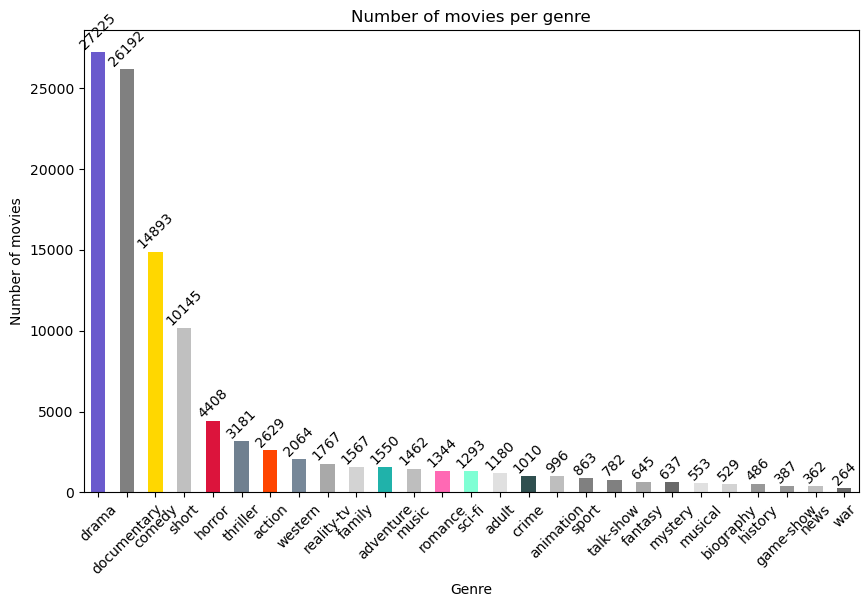

In [35]:
# barchart with the number of movies per genre
plt.figure(figsize=(10, 6))
all_df['genre'].value_counts().plot(kind='bar', color=[genre_colors[x] for x in all_df['genre'].value_counts().index])
for i, v in enumerate(all_df['genre'].value_counts()):
    plt.text(i, v + 10, str(v), ha='center', va='bottom', rotation=45)
plt.title('Number of movies per genre')
plt.ylabel('Number of movies')
plt.xlabel('Genre')
plt.xticks(rotation=45)
plt.show()


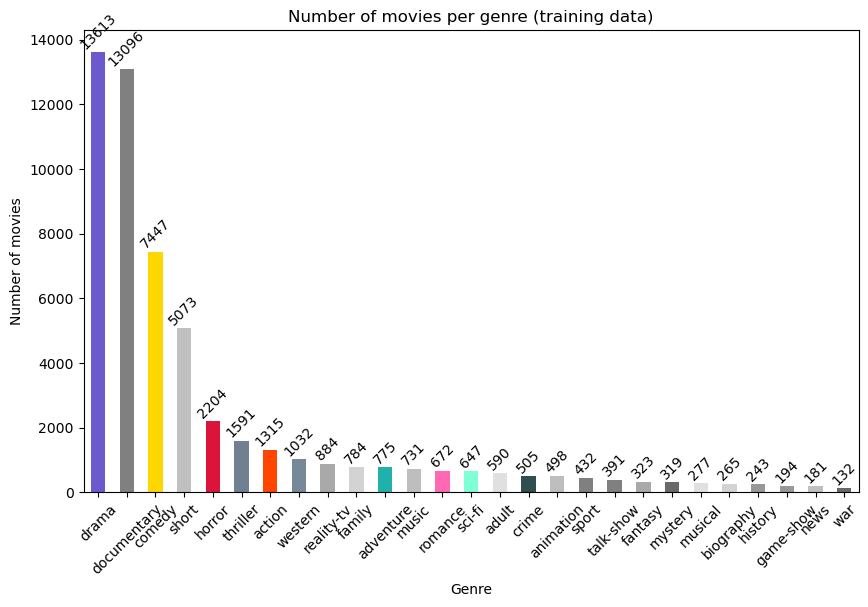

In [36]:
# same plot but only for the training data
plt.figure(figsize=(10, 6))
train_df['genre'].value_counts().plot(kind='bar', color=[genre_colors[x] for x in train_df['genre'].value_counts().index])
# annotate the number of movies per genre (rotate)
for i, v in enumerate(train_df['genre'].value_counts()):
    plt.text(i, v + 10, str(v), ha='center', va='bottom', rotation=45)
plt.title('Number of movies per genre (training data)')
plt.ylabel('Number of movies')
plt.xlabel('Genre')
plt.xticks(rotation=45)
plt.show()


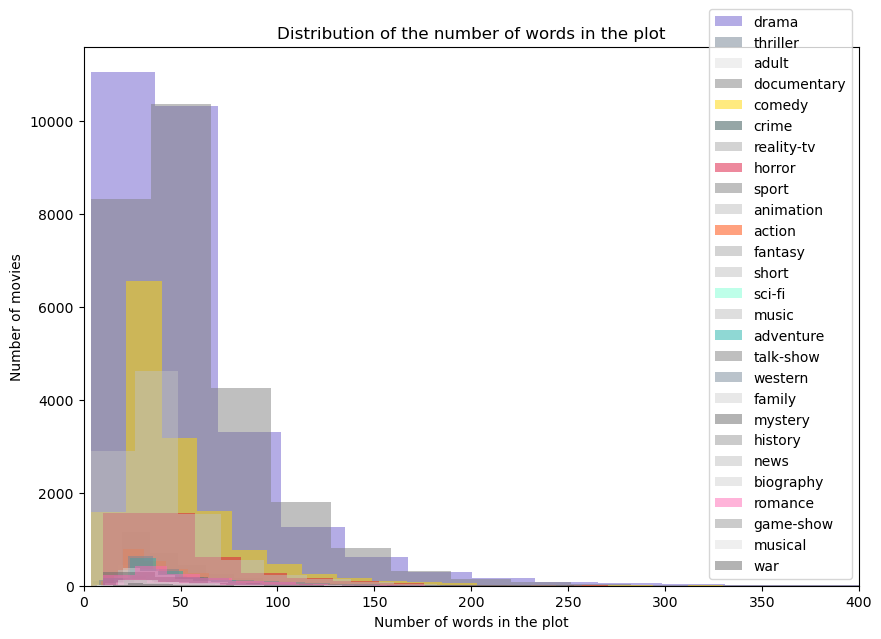

In [37]:
# add a column with the number of words in the processed plot
all_df['plot_len'] = all_df['processed_text'].apply(lambda x: len(x.split()))
# plot the distribution of the number of words in the plot separate  by genre
plt.figure(figsize=(10, 7))
for genre in all_df['genre'].unique():
    plt.hist(all_df[all_df['genre'] == genre]['plot_len'], bins=30, alpha=0.5, label=genre, color=genre_colors[genre])
plt.title('Distribution of the number of words in the plot')
plt.ylabel('Number of movies')
plt.xlabel('Number of words in the plot')
plt.xlim(0, 400)
plt.legend()
plt.show()




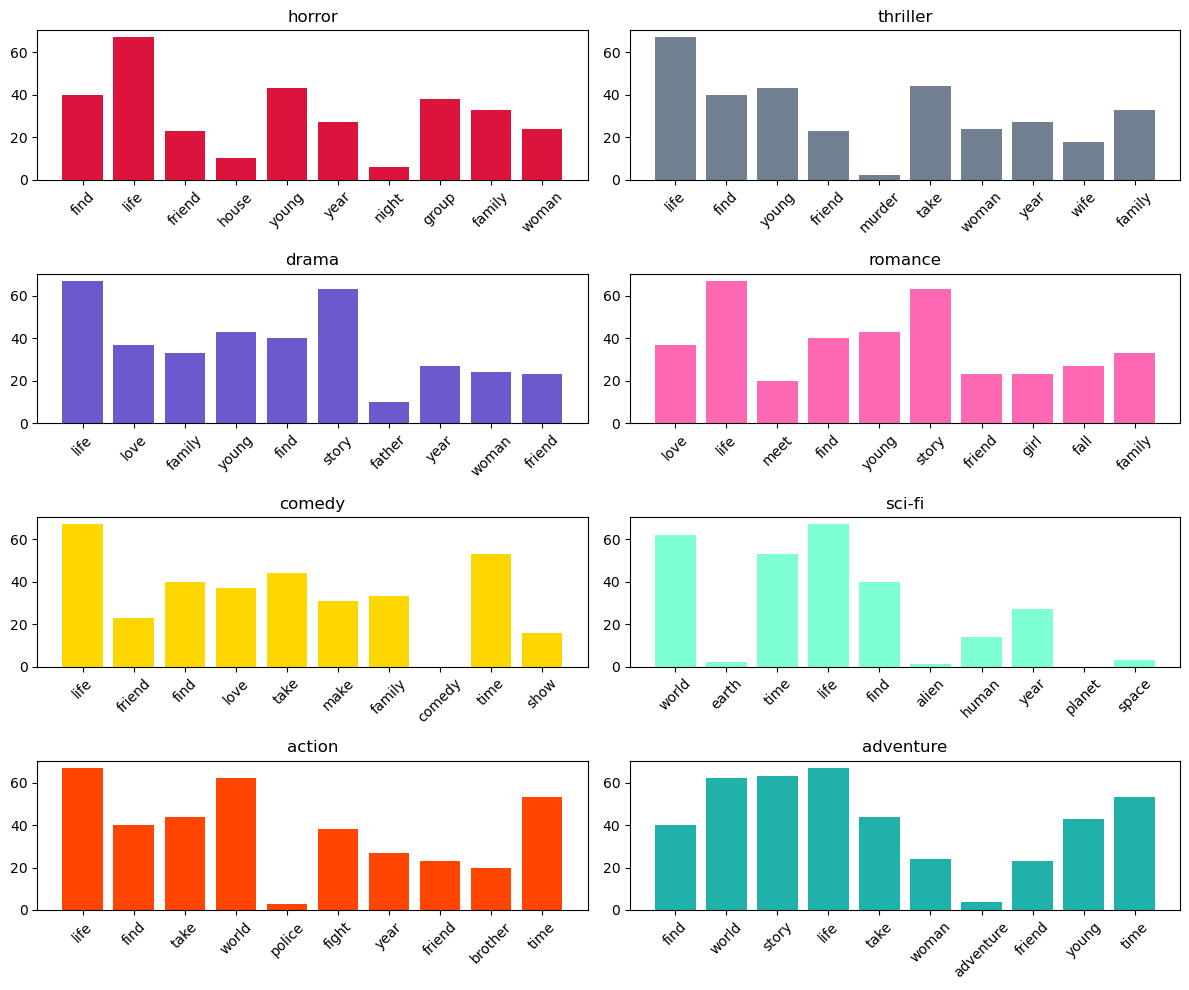

In [38]:
# More frequent words in each genre 

from collections import Counter

# Create a dictionary with the most frequent words in each genre
genre_words = {}

for genre in all_df['genre'].unique():
    # Create a list with all the words in the plot for the genre
    all_words = ' '.join(all_df[all_df['genre'] == genre]['processed_text']).split()
    # Count the number of times each word appears
    word_counts = Counter(all_words)
    # Sort the words by frequency
    genre_words[genre] = sorted(word_counts, key=word_counts.get, reverse=True)
    
# For genres: horror, thriller, drama, romance, comedy, sci-fi, action, adventure plot the most frequent words
plt.figure(figsize=(12, 10))
for i, genre in enumerate(['horror', 'thriller', 'drama', 'romance', 'comedy', 'sci-fi', 'action', 'adventure']):
    plt.subplot(4, 2, i + 1)
    plt.bar(genre_words[genre][:10], [word_counts[word] for word in genre_words[genre][:10]], color=genre_colors[genre])
    plt.title(genre)
    plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
